https://habr.com/ru/companies/wunderfund/articles/683880/

In [1]:
import logging

>Встроенный модуль логирования Python даёт нам простой в использовании функционал и предусматривает пять уровней логирования. Чем выше уровень — тем серьёзнее неприятность, о которой сообщает соответствующая запись. Самый низкий уровень логирования — это debug (10), а самый высокий — это critical (50).

**Логирование в файл**

In [2]:
logging.basicConfig(level=logging.INFO, filename='py_log.py', filemode='w')
logging.debug('A DEBUG Message')
logging.info('An INFO')
logging.warning('A WARNING')
logging.error('AN ERROR')
logging.critical('A message of CRITICAL severity')

>Поговорим о логгере root, рассмотрим параметры basicConfig():

level: это — уровень, на котором нужно начинать логирование. Если он установлен в info — это значит, что все сообщения с уровнем debug игнорируются.

filename: этот параметр указывает на объект обработчика файла. Тут можно указать имя файла, в который нужно осуществлять логирование.

filemode: это — необязательный параметр, указывающий режим, в котором предполагается работать с файлом журнала, заданным параметром filename. Установка filemode в значение w (write, запись) приводит к тому, что логи перезаписываются при каждом запуске модуля. По умолчанию параметр filemode установлен в значение a (append, присоединение), то есть — в файл будут попадать записи из всех сеансов работы программы.

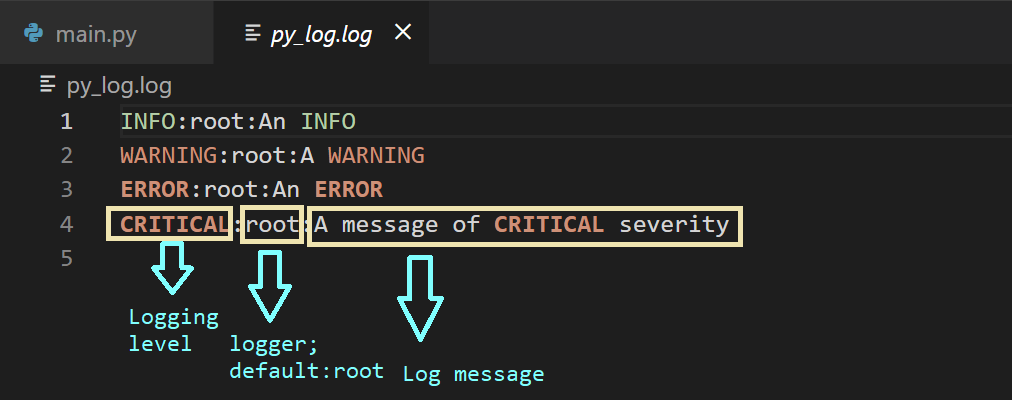

>Помимо базовой информации, выводимой в лог, может понадобится снабдить записи отметками времени, указывающими на момент вывода той или иной записи. Это упрощает анализ логов. Сделать это можно, воспользовавшись параметром конструктора format:

In [ ]:
logging.basicConfig(level=logging.INFO, filename='py_log.py', filemode='w',
                   format='%(asctime)s %(levelname)s %(message)s')

logging.debug('A DEBUG Message')
logging.debug('AN INFO')
logging.warning('A WARNING')
logging.error('AN ERROR')
logging.critical('A message of CRITICAL severity')

**Логирование значений переменных и исключений**

In [5]:
x = 3
y = 4

logging.info(f'The values of vars is {x=} and {y=}')
try:
    x/y
    logging.info(f'x/y successful with result: {x/y}')
except ZeroDivisionError as err:
    logging.error('ZeroDivisionError', exc_info=True)

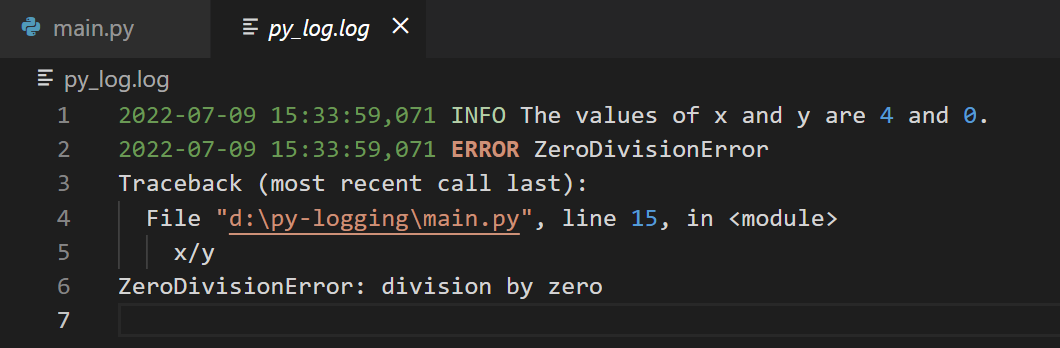

In [6]:
x_vals = [2,3,6,4,10]
y_vals = [5,7,12,0,1]

for x_val, y_val in zip(x_vals, y_vals):
    x,y = x_val, y_val
    logging.info(f'The values of vars is {x=} and {y=}')
    try:
        x/y
        logging.info(f'x/y successful with result: {x/y}')
    except ZeroDivisionError as err:
        logging.exception('ZeroDivisionError')

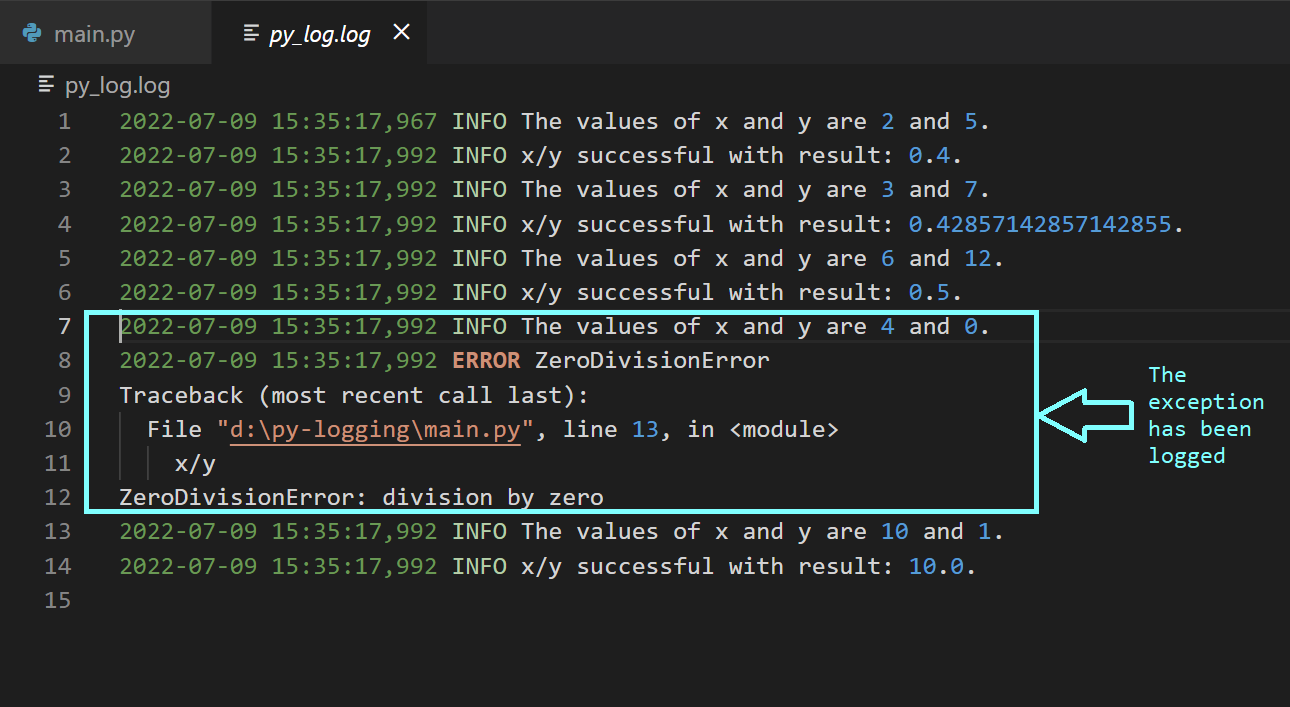

**Настройка логирования с помощью пользовательских логгеров, обработчиков и форматировщиков**

In [ ]:
def test_divison(x,y):
    try:
        x/y
        logger2.info(f'x/y successful with result: {x/y}')
    except ZeroDivisionError as err:
        logger2.exception('ZeroDivisionError')

**Настройка пользовательского логгера для модуля test_div**

In [1]:
import logging

logger2 = logging.getLogger(__name__)
logger2.setLevel(logging.INFO)

# настройка обработчика и форматировщика для logger2
handler2 = logging.FileHandler(f'{__name__}.log', mode='w')
formatter2 = logging.Formatter('%(name)s %(asctime)s %(levelname)s %(message)s')

handler2.setFormatter(formatter2)
logger2.addHandler(handler2)

logger2.info(f'Testing the custom logger for module {__name__}...')

def test_division(x,y):
    try:
        x/y
        logger2.info(f'x/y successful with result {x/y}')
    except ZeroDivisionError as err:
        logger2.exception('ZeroDivisonError')

**Настройка пользовательского логгера для модуля main**

In [ ]:
import logging
from test_div import test_division

# Получение пользовательского логгера и устанока уровня логирования
py_logger = logging.getLogger(__name__)
py_logger.setLevel(logging.INFO)

# Настройка обработчика и форматировщика в соответсвии с нашими нуждами
py_handler = logging.FileHandler(f'{__name__}.log', mode='w')
py_formatter = logging.Formatter('%(name)s %(asctime)s %(levelname)s %(message)s')

py_handler.setFormatter(py_formatter)
py_logger.addHandler(py_handler)

py_logger.info(f'Testing the custom logger for module {__name__}...')

x_vals = [2,3,5,6,5]
y_vals = [4,5,7,8,9]

for x_val, y_val in zip(x_vals, y_vals):
    x,y = x_val, y_val
    test_division(x,y)
    py_logger.info(f'Call test_division args {x} and {y}')